In [716]:
import numpy as np
import scipy.integrate
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

### NOR Gate

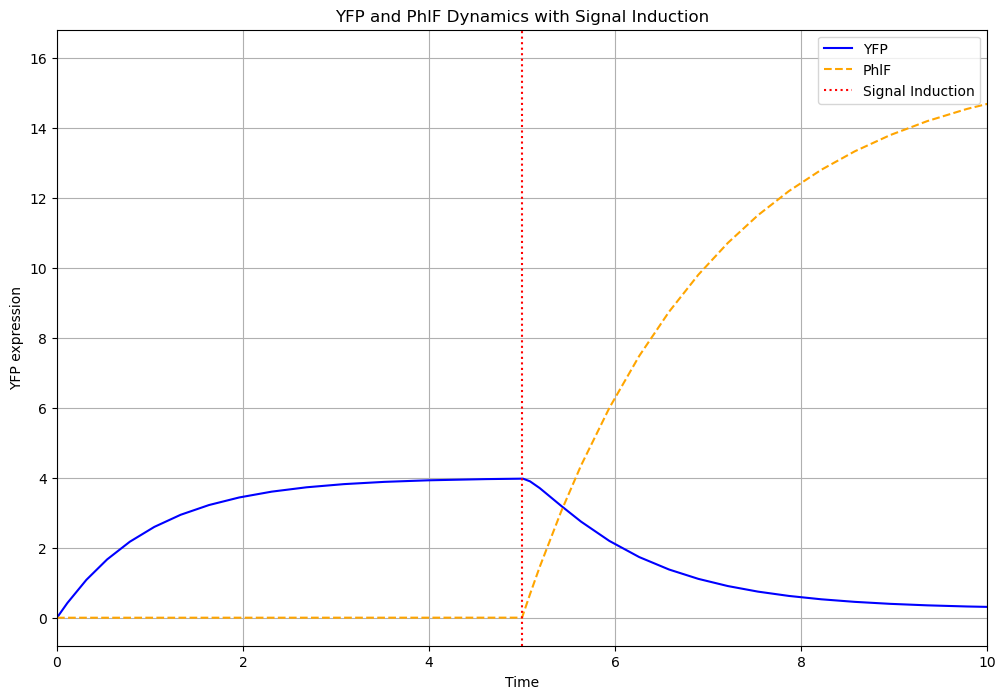

In [719]:
# Constants
k_pluxStar, k_pm, kpPhlF = 5, 3, 4
d_YFP, d_PhlF = 1, 0.5

# Initial values
YFP = 0
PhlF = 0

t_induce = 5

# Define the system of ODEs
def dydt(t, y, k_pluxStar, k_pm, kpPhlF, d_YFP, dPhlF, t_induce):
    YFP, PhlF = y
    
    if t < t_induce:
        AHL, Benzoate = 0, 0 
    else:
        AHL, Benzoate = 1, 1

    dPhlF_dt = (k_pluxStar * (AHL**2)) + (k_pm * Benzoate) - (d_PhlF * PhlF) 
    dYFP_dt = (kpPhlF / (1 + PhlF)) - (d_YFP * YFP)  

    return (dYFP_dt, dPhlF_dt)


dydt_with_params = lambda t, y: dydt(t, y, k_pluxStar, k_pm, kpPhlF, d_YFP, dPhlF, t_induce)

# Solve the system using ODE45
start = timer()
solution = scipy.integrate.solve_ivp(dydt_with_params, t_span=(0, 1000), y0=[YFP, PhlF], method='RK45', rtol=1e-6)
end = timer()

t_ode45 = solution.t  
YFP_ode45 = solution.y[0, :]  
PHLF_ode45 = solution.y[1, :] 

# Plot the results
plt.figure(figsize=(12, 8))

plt.plot(t_ode45, YFP_ode45, label="YFP", linestyle="-", color="blue")
plt.plot(t_ode45, PHLF_ode45, label="PhlF", linestyle="--", color="orange")
plt.xlim(0, 10)
plt.axvline(x=t_induce, color='red', linestyle=':', label="Signal Induction")
plt.title("YFP and PhlF Dynamics with Signal Induction")
plt.xlabel("Time")
plt.ylabel("YFP expression")
plt.legend()
plt.grid()
plt.show()

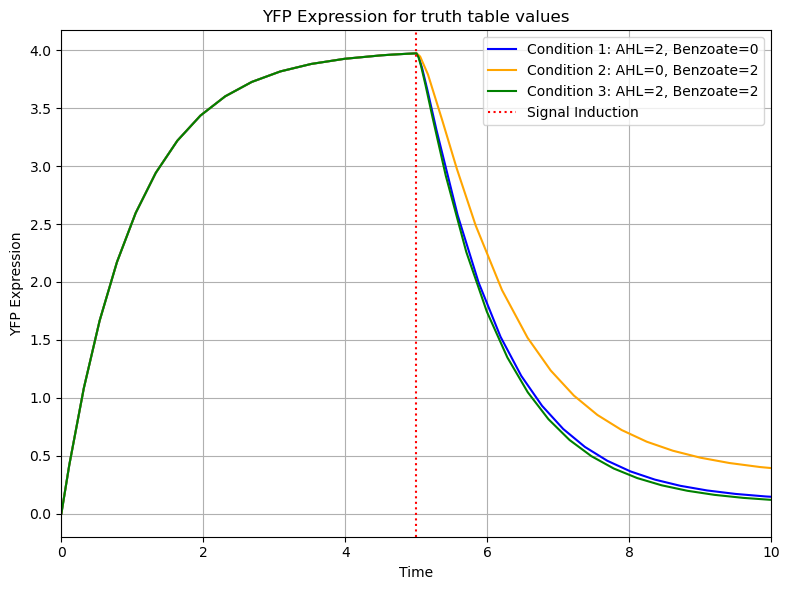

In [723]:
# Define the system of ODEs
def dydt(t, y, k_pluxStar, k_pm, kpPhlF, d_YFP, dPhlF, t_induce, AHL, Benzoate):
    YFP, PhlF = y
    if t < t_induce:
        AHL, Benzoate = 0, 0 
    dPhlF_dt = (k_pluxStar * (AHL**2)) + (k_pm * Benzoate) - (d_PhlF * PhlF) 
    dYFP_dt = (kpPhlF / (1 + PhlF)) - (d_YFP * YFP)  

    return (dYFP_dt, dPhlF_dt)


def solve_condition(AHL, Benzoate):
    dydt_with_params = lambda t, y: dydt(t, y, k_pluxStar, k_pm, kpPhlF, d_YFP, dPhlF, t_induce, AHL, Benzoate)

    start = timer()
    solution = scipy.integrate.solve_ivp(dydt_with_params, t_span=(0, 50), y0=[YFP, PhlF], method='RK45', rtol=1e-6)
    end = timer()
    
    return solution

# Simulate for the three conditions
conditions = [
    (2, 0),  # AHL = 1, Benzoate = 0
    (0, 2),  # AHL = 0, Benzoate = 1
    (2, 2)   # AHL = 1, Benzoate = 1
]

# Solve the system for each condition
solutions = []
for AHL, Benzoate in conditions:
    solution = solve_condition(AHL, Benzoate)
    solutions.append(solution)

# Plotting the results
plt.figure(figsize=(8, 6))

# Plot YFP expression for each condition
colors = ['blue', 'orange', 'green']
labels = ['Condition 1: AHL=2, Benzoate=0', 'Condition 2: AHL=0, Benzoate=2', 'Condition 3: AHL=2, Benzoate=2']

for i, solution in enumerate(solutions):
    plt.plot(solution.t, solution.y[0], label=labels[i], color=colors[i])


plt.title('YFP Expression for truth table values')
plt.xlabel('Time')
plt.ylabel('YFP Expression')
plt.axvline(x=t_induce, color='red', linestyle=':', label="Signal Induction")
plt.legend()
plt.xlim(0, 10) 
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


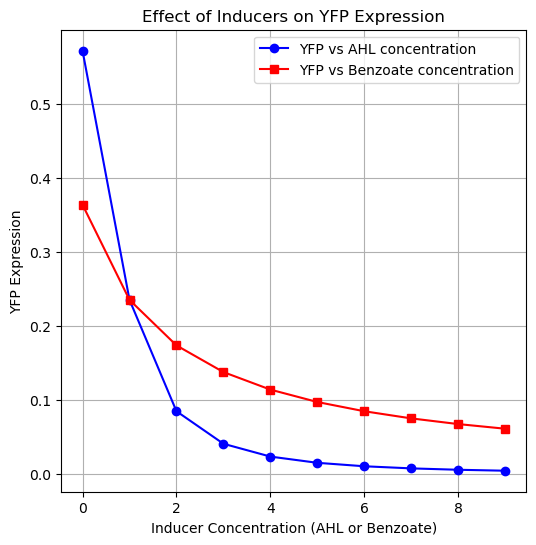

In [725]:
# Define the system of ODEs
def dydt(t, y, k_pluxStar, k_pm, kpPhlF, d_YFP, dPhlF, t_induce, AHL, Benzoate):
    YFP, PhlF = y
    
    if t < t_induce:
        AHL, Benzoate = 0, 0  
    # No need for an else, AHL and Benzoate are passed as arguments

    dPhlF_dt = (k_pluxStar * (AHL**2)) + (k_pm * Benzoate) - (d_PhlF * PhlF)
    dYFP_dt = (kpPhlF / (1 + PhlF)) - (d_YFP * YFP)

    return (dYFP_dt, dPhlF_dt)


# Create an array of different inducer concentrations 
AHL_values = np.arange(0, 10)  
Benzoate_values = np.arange(0, 10)  

yfp_values_ahl = []  # Store results for varying AHL
yfp_values_benzoate = []  # Store results for varying Benzoate

# Solve the system for each AHL concentration (while keeping Benzoate constant)
for AHL_conc in AHL_values:
    dydt_with_params = lambda t, y: dydt(t, y, k_pluxStar, k_pm, kpPhlF, d_YFP, dPhlF, t_induce, AHL_conc, 1)

    # Solve the ODE system
    start = timer()
    solution = scipy.integrate.solve_ivp(dydt_with_params, t_span=(0, 1000), y0=[YFP, PhlF], method='RK45', rtol=1e-6)
    end = timer()
    
    # Get the final value of YFP from the solution
    final_YFP = solution.y[0, -1]
    yfp_values_ahl.append(final_YFP)

# Solve the system for each Benzoate concentration (while keeping AHL constant)
for Benzoate_conc in Benzoate_values:
    dydt_with_params = lambda t, y: dydt(t, y, k_pluxStar, k_pm, kpPhlF, d_YFP, dPhlF, t_induce, 1, Benzoate_conc)

    # Solve the ODE system
    start = timer()
    solution = scipy.integrate.solve_ivp(dydt_with_params, t_span=(0, 1000), y0=[YFP, PhlF], method='RK45', rtol=1e-6)
    end = timer()
    
    # Get the final value of YFP from the solution
    final_YFP = solution.y[0, -1]
    yfp_values_benzoate.append(final_YFP)

# Plot the results (YFP vs. AHL and Benzoate)
plt.figure(figsize=(6, 6))

# Plot YFP as a function of AHL concentration
plt.plot(AHL_values, yfp_values_ahl, label='YFP vs AHL concentration', color='blue', marker='o', linestyle='-', markersize=6)

# Plot YFP as a function of Benzoate concentration
plt.plot(Benzoate_values, yfp_values_benzoate, label='YFP vs Benzoate concentration', color='red', marker='s', linestyle='-', markersize=6)

plt.xlabel('Inducer Concentration (AHL or Benzoate)')
plt.ylabel('YFP Expression')
plt.title('Effect of Inducers on YFP Expression')
plt.legend()
plt.grid(True)
plt.show()

### NAND Gate

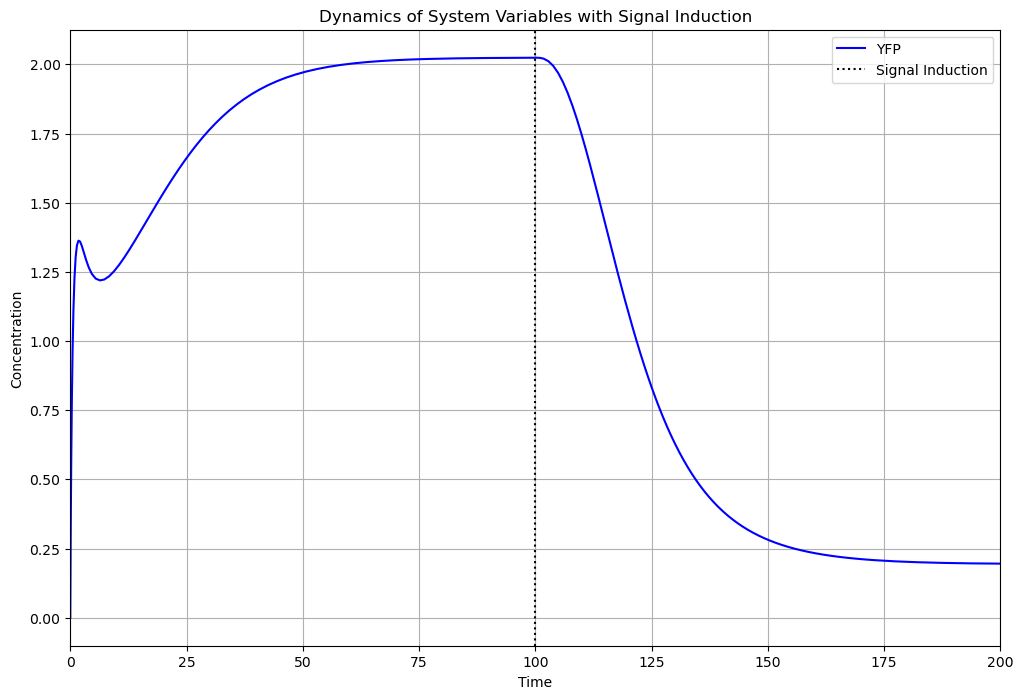

In [735]:
# Constants
k_pluxStar, k_pm, kpPhlF = 5, 3, 4
kpHlyIIR, kpAmtR, kpBetI = 4, 2, 2
d_YFP, d_PhlF, d_HlyIIR, d_AmtR, d_BetI = 1, 0.1, 0.1, 0.1, 0.1

# Initial values
YFP = 0
PhlF = 0
HlyIIR = 0
AmtR = 0
BetI = 0

t_induce = 100

# Define the system of ODEs
def dydt(t, y, k_pluxStar, k_pm, kpPhlF, kpHlyIIR, kpAmtR, kpBetI, 
         d_YFP, d_PhlF, d_HlyIIR, d_AmtR, d_BetI, t_induce):
    YFP, PhlF, HlyIIR, AmtR, BetI = y
    
    if t < t_induce:
        AHL, Benzoate = 0, 0 
    else:
        AHL, Benzoate = 1, 1

    dYFP_dt = (kpPhlF / (1 + PhlF)) - (d_YFP * YFP)
    dPhlF_dt = (kpHlyIIR / (1 + HlyIIR)) - (d_PhlF * PhlF)
    dHlyIIR_dt = (kpAmtR / (1 + AmtR)) + (kpBetI / (1 + BetI)) - (d_HlyIIR * HlyIIR)
    dAmtR_dt = (k_pluxStar * (AHL**2)) - (d_AmtR * AmtR)
    dBetI_dt = (k_pm * Benzoate) - (d_BetI * BetI)

    return (dYFP_dt, dPhlF_dt, dHlyIIR_dt, dAmtR_dt, dBetI_dt)

dydt_with_params = lambda t, y: dydt(t, y, 
                                     k_pluxStar, k_pm, kpPhlF, kpHlyIIR, kpAmtR, kpBetI, 
                                     d_YFP, d_PhlF, d_HlyIIR, d_AmtR, d_BetI, t_induce)

start = timer()
solution = scipy.integrate.solve_ivp(dydt_with_params, t_span=(0, 1000), y0=[YFP, PhlF, HlyIIR, AmtR, BetI], method='RK45', rtol=1e-6)
end = timer()

t_ode45 = solution.t  
YFP_ode45 = solution.y[0, :]  # YFP concentration
PHLF_ode45 = solution.y[1, :]  # PhlF concentration

# Plot the results
plt.figure(figsize=(12, 8))

# Plot each variable
plt.plot(t_ode45, YFP_ode45, label="YFP", linestyle="-", color="blue")

plt.axvline(x=t_induce, color='black', linestyle=':', label="Signal Induction")
plt.xlim(0, 200)
plt.title("Dynamics of System Variables with Signal Induction")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.grid()
plt.show()

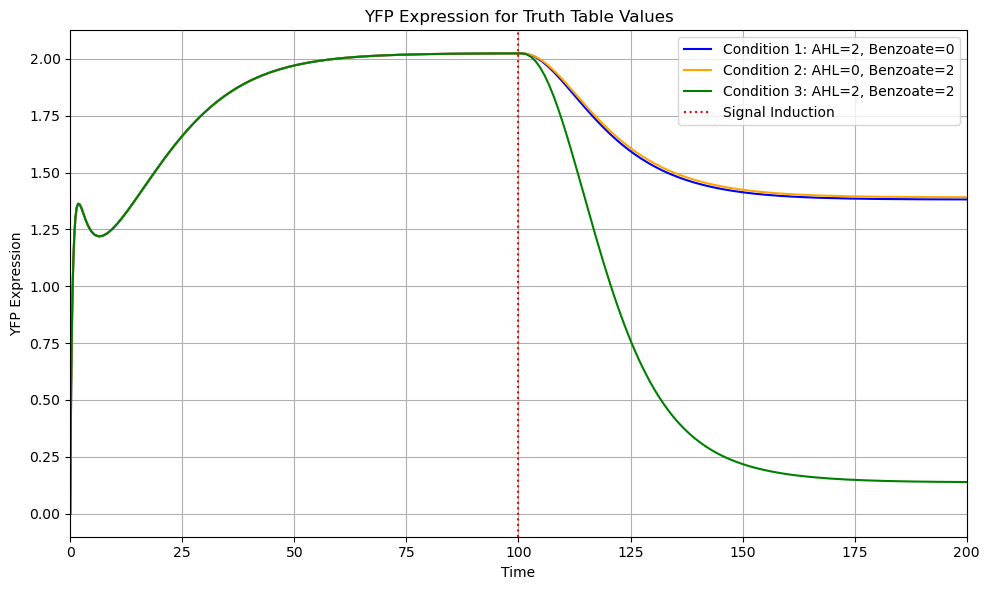

In [737]:
# Define the system of ODEs
def dydt(t, y, k_pluxStar, k_pm, kpPhlF, kpHlyIIR, kpAmtR, kpBetI, 
         d_YFP, d_PhlF, d_HlyIIR, d_AmtR, d_BetI, t_induce, AHL, Benzoate):
    YFP, PhlF, HlyIIR, AmtR, BetI = y
    
    if t < t_induce:
        AHL, Benzoate = 0, 0 
    else:
        pass  
    
    dYFP_dt = (kpPhlF / (1 + PhlF)) - (d_YFP * YFP)
    dPhlF_dt = (kpHlyIIR / (1 + HlyIIR)) - (d_PhlF * PhlF)
    dHlyIIR_dt = (kpAmtR / (1 + AmtR)) + (kpBetI / (1 + BetI)) - (d_HlyIIR * HlyIIR)
    dAmtR_dt = (k_pluxStar * (AHL**2)) - (d_AmtR * AmtR)
    dBetI_dt = (k_pm * Benzoate) - (d_BetI * BetI)

    return (dYFP_dt, dPhlF_dt, dHlyIIR_dt, dAmtR_dt, dBetI_dt)

# Function to solve ODEs for a given AHL and Benzoate condition
def solve_condition(AHL, Benzoate):
    dydt_with_params = lambda t, y: dydt(t, y, 
                                         k_pluxStar, k_pm, kpPhlF, kpHlyIIR, kpAmtR, kpBetI, 
                                         d_YFP, d_PhlF, d_HlyIIR, d_AmtR, d_BetI, t_induce, AHL, Benzoate)
    
    start = timer()
    solution = scipy.integrate.solve_ivp(dydt_with_params, t_span=(0, 1000), y0=[YFP, PhlF, HlyIIR, AmtR, BetI], method='RK45', rtol=1e-6)
    end = timer()
    
    return solution

# Simulate for the three conditions
conditions = [
    (2, 0),  # AHL = 2, Benzoate = 0
    (0, 2),  # AHL = 0, Benzoate = 2
    (2, 2)   # AHL = 2, Benzoate = 2
]

# Solve the system for each condition
solutions = []
for AHL, Benzoate in conditions:
    solution = solve_condition(AHL, Benzoate)
    solutions.append(solution)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot YFP expression for each condition
colors = ['blue', 'orange', 'green']
labels = ['Condition 1: AHL=2, Benzoate=0', 'Condition 2: AHL=0, Benzoate=2', 'Condition 3: AHL=2, Benzoate=2']

for i, solution in enumerate(solutions):
    plt.plot(solution.t, solution.y[0], label=labels[i], color=colors[i])

plt.title('YFP Expression for Truth Table Values')
plt.xlabel('Time')
plt.ylabel('YFP Expression')
plt.axvline(x=t_induce, color='red', linestyle=':', label="Signal Induction")
plt.legend()
plt.xlim(0, 200)  
plt.grid(True)

plt.tight_layout()
plt.show()